2.3e+01 ms per second of audio.
3.3e+01 ms per second of audio.


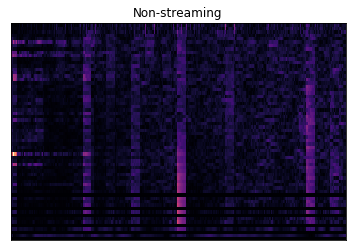

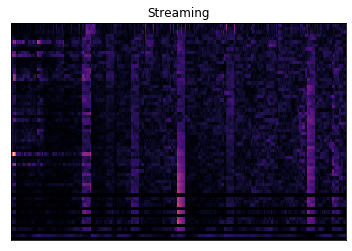

In [2]:
import time
import librosa
import librosa.display
import matplotlib.pyplot as plt
import torch

import pcen

transform = pcen.StreamingPCENTransform(n_mels=64, n_fft=256, hop_length=32)
x = torch.tensor(librosa.core.load("output/damselfish/30.wav", sr=5000)[0]).unsqueeze(0).c
n = 100

# Non-streaming
a = time.perf_counter()
for _ in range(n):
    y = transform(x)
    transform.reset()
b = time.perf_counter()
print("{:.2} ms per second of audio.".format((b - a) / n * 1000))

x_chunks = x.split(800, 1)
a = time.perf_counter()
for _ in range(n):
    y_chunks = list(map(transform, x_chunks))
    transform.reset()
b = time.perf_counter()
print("{:.2} ms per second of audio.".format((b - a) / n * 1000))

librosa.display.specshow(y[0].cpu().numpy().T)
plt.title("Non-streaming")
plt.show()

librosa.display.specshow(torch.cat(y_chunks, 1)[0].cpu().numpy().T)
plt.title("Streaming")
plt.show()

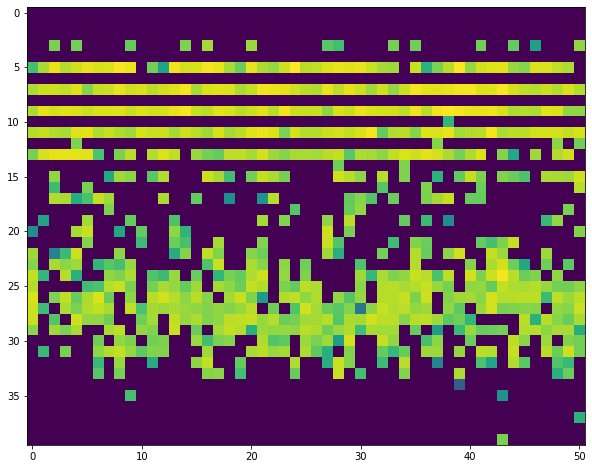

In [79]:
import torchaudio
from torchaudio.transforms import MelSpectrogram, AmplitudeToDB, MFCC

sig, sr = torchaudio.load(
    "output/damselfish/30.wav",
)

mel = MFCC(
    #f_min=200.0,
    #f_max=1000.0,
    #hop_length=32,
    #n_fft=256,
    #n_mels=64,
    #pad=0,
    #win_length=None
)(sig)

mel = AmplitudeToDB(top_db=50)(mel)

plt.figure(figsize=(10,13))
p = plt.imshow(mel[0,:,:].detach().numpy())

In [10]:
from IPython.display import Audio

Audio("output/damselfish/30.wav")

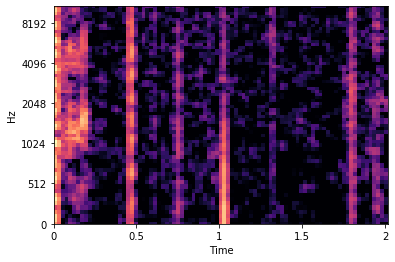

In [61]:
import numpy as np

y, sr = librosa.load('output/damselfish/30.wav')

s = librosa.feature.melspectrogram(y,
                                   n_mels=64,
                                   fmin=200,
                                   fmax=1000,
                                   power=2.0)

log_S = librosa.amplitude_to_db(s, top_db=50)
librosa.display.specshow(log_S, x_axis='time', y_axis='mel')

In [69]:
gain          = 0.6
bias          = 0.1 
power         = 0.2 
time_constant = 0.4 
eps           = 1e-9

time_constant = 0.4

power_to_db = librosa.power_to_db(s)

pcen_librosa = librosa.core.pcen(mel[0,:,:].detach().numpy(), 
                                 sr            = sr,
                                 hop_length    = hop_length,
                                 gain          = gain,
                                 bias          = bias,
                                 power         = power,
                                 time_constant = time_constant,
                                 eps           = eps)

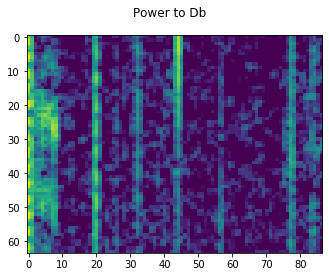

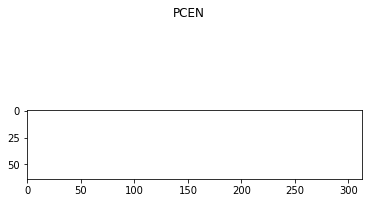

In [70]:
fig = plt.figure()
fig.suptitle("Power to Db")
plt.imshow(log_S)


fig = plt.figure()
fig.suptitle("PCEN")
plt.imshow(pcen_librosa)